# Visualisation of hotel trends

In [1]:
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# graphing style
plt.style.use("seaborn")

In [4]:
# Load csv file into a dataframe
year_df = pd.read_csv("Data/hotel_yrrate.csv")
year_df.head()

,Year,Yearly Rate
0,2006,46488.121
1,2014,79795.282
2,2011,55845.469
3,2009,43366.102
4,2004,19596.943


In [5]:
# Sort the dataframe by year
year_df.sort_values("Year", inplace = True)
year_df = year_df.reset_index(drop = True)

In [6]:
# Create a subset of complete years (incomplete: 2004 and 2018)
inc = [2004, 2018]

year_subdf = year_df[~year_df["Year"].isin(inc)]

In [7]:
# Calculate the difference per year
values = pd.Series(year_subdf["Yearly Rate"].pct_change() * 100)
year_subdf.insert(loc = 2, column = "% Year Diff", value = values.values)

(0, 108309.66900000001)

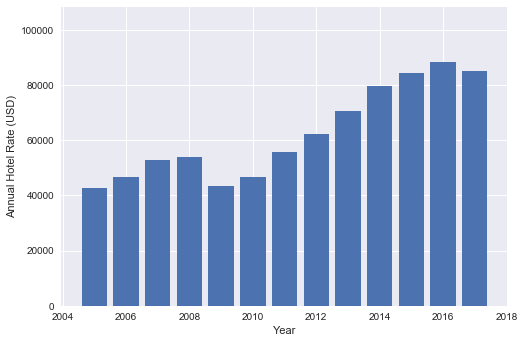

In [8]:
# Create a bar graph to show trends in hotel yearly rates
plt.bar("Year", "Yearly Rate", data = year_subdf)
plt.xlabel("Year")
plt.ylabel("Annual Hotel Rate (USD)")
plt.ylim(0, max(year_subdf["Yearly Rate"] + 20000))

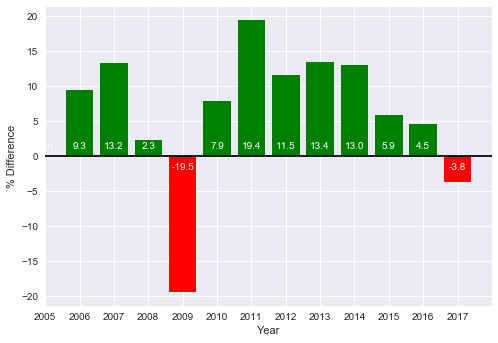

In [11]:
year = np.arange(1,len(year_subdf["Year"])+1)
diff = year_subdf["% Year Diff"]


plt.bar(year, diff, color = ["green" if diff[i] > 0 else "red" for i in year])
plt.xticks(year, year_subdf["Year"])
plt.axhline(y = 0, color = "black")
plt.xlabel("Year")
plt.ylabel("% Difference")

# add label to each bar
count = 1

for i in diff:
    if i < 0:
        y = -2
    else:
        y = 1
    plt.text(count, y, str(round(i, 1)) , color = "white", ha = "center")
    count += 1
    